In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/projects/mitochondria



/content/drive/MyDrive/projects/mitochondria


In [3]:
!ls

 data			   patches	        unet.py
'Generate Patches.ipynb'   __pycache__
 mitochondria_test.hdf5    Segmentation.ipynb


In [4]:
from unet import simple_unet_model
from tensorflow.keras.utils import normalize
import os
import glob
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
train_image_directory = 'patches/images/*.tif' 
train_mask_directory = 'patches/masks/*.tif' 

In [6]:
image_names  = glob.glob(train_image_directory)
mask_names = glob.glob(train_mask_directory)

In [7]:
image_names.sort()
mask_names.sort()
print(image_names[:5])
print(mask_names[:5])

['patches/images/image_0_00.tif', 'patches/images/image_0_01.tif', 'patches/images/image_0_02.tif', 'patches/images/image_0_03.tif', 'patches/images/image_0_10.tif']
['patches/masks/image_0_00.tif', 'patches/masks/image_0_01.tif', 'patches/masks/image_0_02.tif', 'patches/masks/image_0_03.tif', 'patches/masks/image_0_10.tif']


In [8]:
train_image_dataset = [cv2.imread(image, 0) for image in image_names]
train_image_dataset = np.expand_dims(normalize(np.array(train_image_dataset), 1),3)
train_mask_dataset = [cv2.imread(mask, 0) for mask in mask_names]
train_mask_dataset = np.expand_dims(np.array(train_mask_dataset),3)/255.0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_image_dataset, train_mask_dataset, test_size=0.2, random_state= 1)

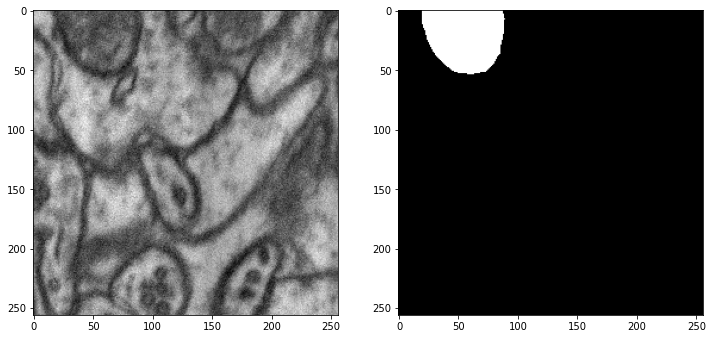

In [10]:
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [11]:
channels = train_image_dataset.shape[3]
epochs = 64
batch_size = 32
size = 256

In [12]:
def unet_model(w,h,c):
    return simple_unet_model(w,h,c)

In [13]:
model = unet_model(size,size,channels)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________

In [14]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test,y_test), shuffle = True,verbose = 1)

Epoch 1/64
50/50 [==============================] - 72s 764ms/step - loss: 0.2798 - accuracy: 0.9222 - val_loss: 0.2365 - val_accuracy: 0.9413
Epoch 2/64
50/50 [==============================] - 32s 647ms/step - loss: 0.1794 - accuracy: 0.9443 - val_loss: 0.2186 - val_accuracy: 0.9413
Epoch 3/64
50/50 [==============================] - 32s 646ms/step - loss: 0.1154 - accuracy: 0.9443 - val_loss: 0.1535 - val_accuracy: 0.9413
Epoch 4/64
50/50 [==============================] - 32s 646ms/step - loss: 0.0899 - accuracy: 0.9443 - val_loss: 0.1592 - val_accuracy: 0.9413
Epoch 5/64
50/50 [==============================] - 32s 645ms/step - loss: 0.0681 - accuracy: 0.9563 - val_loss: 0.0744 - val_accuracy: 0.9774
Epoch 6/64
50/50 [==============================] - 32s 646ms/step - loss: 0.0615 - accuracy: 0.9821 - val_loss: 0.0970 - val_accuracy: 0.9719
Epoch 7/64
50/50 [==============================] - 32s 645ms/step - loss: 0.0540 - accuracy: 0.9872 - val_loss: 0.0763 - val_accuracy: 0.9805

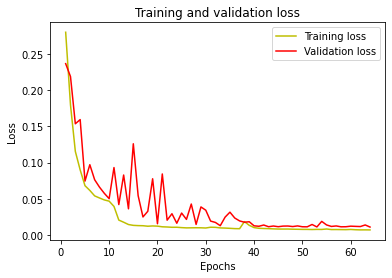

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model.save('mitochondria.hdf5')

In [17]:
%ls

 data/                     mitochondria_test.hdf5   Segmentation.ipynb
'Generate Patches.ipynb'   patches/                 unet.py
 mitochondria.hdf5         __pycache__/
